<a href="https://colab.research.google.com/github/tokaalaa/DM_Course/blob/main/sheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
from sklearn.neighbors import kneighbors_graph
import numpy as np

# Data Points

In [ ]:
X = [[2, 4],#p
     [3, 3],#v
     [3, 4],#q
     [5, 4],#r
     [5, 6],#h
     [5, 8],#a
     [6, 4],#s
     [6, 5],#k
     [6, 7],#d
     [7, 3],#w
     [7, 4],#t
     [8, 2],#x
     [9, 4],#l
     [10, 6],#i
     [10, 7],#e
     [10, 9],#b
     [11, 5],#m
     [11, 8],#c
     [12, 7],#f
     [13, 6],#j
     [13, 7],#g
     [14, 6],#n
     [15, 4],#u
     [15, 5]#o
     ]

# Ncut algorithm

In [ ]:
def Ncut(kernel , gamma=0.01):
    if(kernel=="rbf"):
      A = rbf_kernel(X, gamma=gamma)
    else:
      A = kneighbors_graph(X, 3, mode='connectivity')
      A = A.toarray()
      A = 0.5 *(A + A.T)
    print("A= "+ str(A) + "\n")

    D = A.sum(axis = 1)
    D = np.diag(D)
    print("D= "+ str(D) + "\n")

    L = D - A
    La = np.linalg.inv(D) @ L #normalized cut
    print(La)

    eigvals, eigvecs = np.linalg.eig(La)
    sortedIndex = np.argsort(eigvals)
    eigvals = eigvals[sortedIndex]
    eigvecs= eigvecs[:, sortedIndex]
    print("eigvals= " + str(eigvals) + "\n")
    print("eigvecs= " + str(eigvecs) + "\n")

    k = 3
    U = eigvecs[:, 0:k]
    print("U= " + str(U) + "\n")

    Y = normalize(U, axis = 1)
    print("Y= " + str(Y) + "\n")

    return Y


In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def plotY(Y): 
  # Creating figure
  fig = plt.figure(figsize = (8, 8))
  ax = plt.axes(projection ="3d")
  
  # Creating plot
  ax.scatter3D(Y[:,0],Y[:,1],Y[:,2], color = "green")
  ax.set_xlabel('X-axis', fontweight ='bold') 
  ax.set_ylabel('Y-axis', fontweight ='bold') 
  ax.set_zlabel('Z-axis', fontweight ='bold')

  # show plot
  plt.show()

## rbf , gamma = 0.01

In [ ]:
Y = Ncut("rbf",0.01)

A= [[1.         0.98019867 0.99004983 0.91393119 0.87809543 0.77880078
  0.85214379 0.84366482 0.77880078 0.77105159 0.77880078 0.67032005
  0.61262639 0.50661699 0.48190899 0.41065575 0.44043165 0.37908304
  0.33621649 0.2865048  0.27253179 0.22763769 0.18451952 0.18268352]
 [0.98019867 1.         0.99004983 0.95122942 0.87809543 0.74826357
  0.90483742 0.87809543 0.77880078 0.85214379 0.84366482 0.77105159
  0.69073433 0.55989837 0.52204578 0.42741493 0.50661699 0.41065575
  0.37908304 0.33621649 0.31348618 0.27253179 0.23457029 0.22763769]
 [0.99004983 0.99004983 1.         0.96078944 0.92311635 0.81873075
  0.91393119 0.90483742 0.83527021 0.84366482 0.85214379 0.74826357
  0.69767633 0.58860497 0.55989837 0.47711392 0.52204578 0.44932896
  0.40656966 0.35345468 0.33621649 0.2865048  0.23692776 0.23457029]
 [0.91393119 0.95122942 0.96078944 1.         0.96078944 0.85214379
  0.99004983 0.98019867 0.90483742 0.95122942 0.96078944 0.87809543
  0.85214379 0.74826357 0.71177032 0.60653

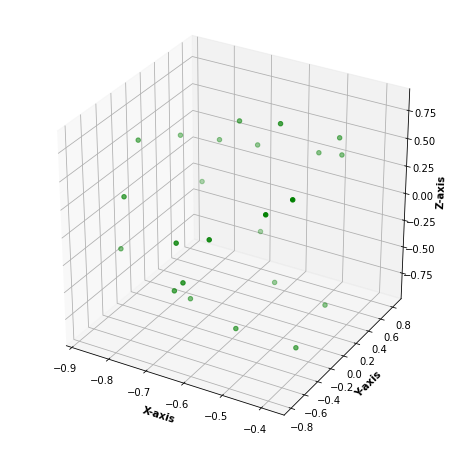

In [ ]:
plotY(Y)

## rbf , gamma = 0.1

In [ ]:
Y = Ncut("rbf",0.1)

A= [[1.00000000e+00 8.18730753e-01 9.04837418e-01 4.06569660e-01
  2.72531793e-01 8.20849986e-02 2.01896518e-01 1.82683524e-01
  8.20849986e-02 7.42735782e-02 8.20849986e-02 1.83156389e-02
  7.44658307e-03 1.11377515e-03 6.75538775e-04 1.36388926e-04
  2.74653570e-04 6.12834951e-05 1.84582340e-05 3.72665317e-06
  2.26032941e-06 3.73629938e-07 4.57533877e-08 4.13993772e-08]
 [8.18730753e-01 1.00000000e+00 9.04837418e-01 6.06530660e-01
  2.72531793e-01 5.50232201e-02 3.67879441e-01 2.72531793e-01
  8.20849986e-02 2.01896518e-01 1.82683524e-01 7.42735782e-02
  2.47235265e-02 3.02755475e-03 1.50343919e-03 2.03468369e-04
  1.11377515e-03 1.36388926e-04 6.12834951e-05 1.84582340e-05
  9.16608774e-06 2.26032941e-06 5.04347663e-07 3.73629938e-07]
 [9.04837418e-01 9.04837418e-01 1.00000000e+00 6.70320046e-01
  4.49328964e-01 1.35335283e-01 4.06569660e-01 3.67879441e-01
  1.65298888e-01 1.82683524e-01 2.01896518e-01 5.50232201e-02
  2.73237224e-02 4.99159391e-03 3.02755475e-03 6.11252761e-04
  1

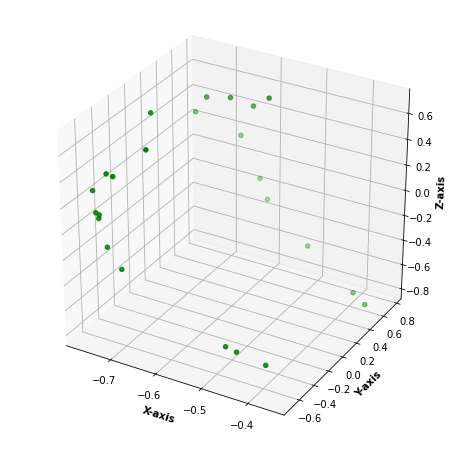

In [ ]:
plotY(Y)

## rbf , gamma = 1

In [ ]:
Y = Ncut("rbf",1)

A= [[1.00000000e+00 1.35335283e-01 3.67879441e-01 1.23409804e-04
  2.26032941e-06 1.38879439e-11 1.12535175e-07 4.13993772e-08
  1.38879439e-11 5.10908903e-12 1.38879439e-11 4.24835426e-18
  5.24288566e-22 2.93748211e-30 1.97925988e-32 2.22736356e-39
  2.44260074e-36 7.47197234e-43 4.59093847e-48 5.16642063e-55
  3.48110684e-57 5.30171867e-65 4.02006022e-74 1.47889751e-74]
 [1.35335283e-01 1.00000000e+00 3.67879441e-01 6.73794700e-03
  2.26032941e-06 2.54366565e-13 4.53999298e-05 2.26032941e-06
  1.38879439e-11 1.12535175e-07 4.13993772e-08 5.10908903e-12
  8.53304763e-17 6.47023493e-26 5.90009054e-29 1.21609930e-37
  2.93748211e-30 2.22736356e-39 7.47197234e-43 4.59093847e-48
  4.18639400e-51 3.48110684e-57 1.06487866e-63 5.30171867e-65]
 [3.67879441e-01 3.67879441e-01 1.00000000e+00 1.83156389e-02
  3.35462628e-04 2.06115362e-09 1.23409804e-04 4.53999298e-05
  1.52299797e-08 4.13993772e-08 1.12535175e-07 2.54366565e-13
  2.31952283e-16 9.60268005e-24 6.47023493e-26 7.28129018e-33
  5

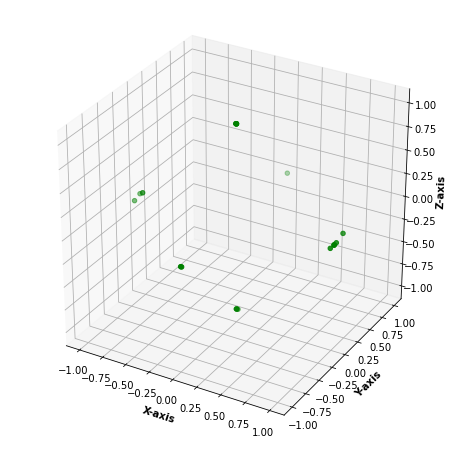

In [ ]:
plotY(Y)

## rbf , gamma = 10

In [ ]:
Y = Ncut("rbf",10)

A= [[1.00000000e+000 2.06115362e-009 4.53999298e-005 8.19401262e-040
  3.48110684e-057 2.66919022e-109 3.25748853e-070 1.47889751e-074
  2.66919022e-109 1.21181048e-113 2.66919022e-109 1.91516960e-174
  1.56929239e-213 4.78357190e-296 9.22631527e-318 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [2.06115362e-009 1.00000000e+000 4.53999298e-005 1.92874985e-022
  3.48110684e-057 1.13396656e-126 3.72007598e-044 3.48110684e-057
  2.66919022e-109 3.25748853e-070 1.47889751e-074 1.21181048e-113
  2.04664112e-161 1.28588016e-252 5.11195195e-283 0.00000000e+000
  4.78357190e-296 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.53999298e-005 4.53999298e-005 1.00000000e+000 4.24835426e-018
  1.80485139e-035 1.38389653e-087 8.19401262e-040 3.72007598e-044
  6.71418429e-079 1.47889751e-074 3.25748853e-070 1.13396656e-126
  4.5

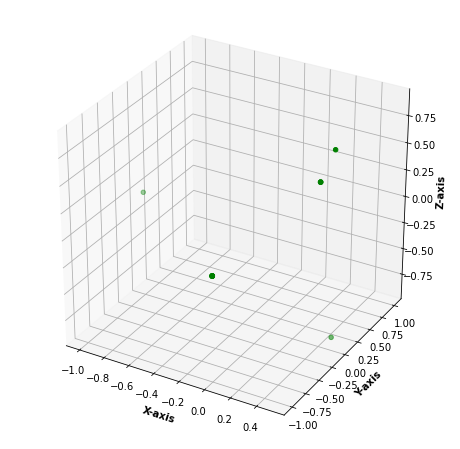

In [ ]:
plotY(Y)

## 3-NN

In [ ]:
Y = Ncut("3-NN")

A= [[0.  1.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [1.  0.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.5 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  1.  0.  0.5 1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  0.5 1.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  1.  1.  0.5 0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.

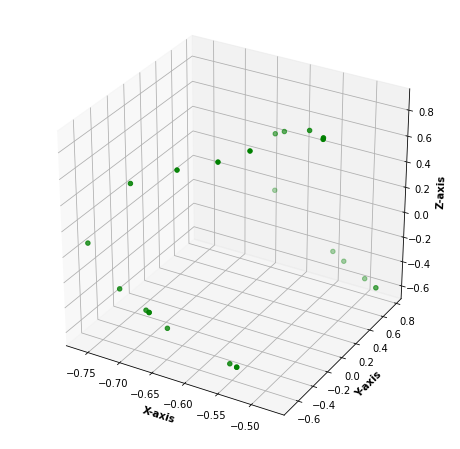

In [ ]:
plotY(Y)